# VT1

This is the Script for the VT1 which shall fullfill the following tasks:


## Import of Packages

In [56]:
# Import of Packages
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Import of Excel Data
(General Format of Excel must be Headers followed by columns of Data)

In [57]:
# Reading the excel file
df = pd.read_excel("Sample.xlsx")
# print(df)

## Creating Scenarios
Calculation of Driftrate Mu and Standart Deviation Sigma


In [58]:
Year = np.array(df.iloc[:, 0])
Historic_Demand = np.array(df.iloc[:, 1])
Annual_Change = np.array(df.iloc[:, 2])
Percentage_Change = np.array(df.iloc[:, 3])
Outliner = np.array(df.iloc[:, 4])
Percentage_Change1 = np.array(df.iloc[:, 5])

# Caluclation of the Estimated Percentage Drift Rate Mu:
mu = np.nanmean(Percentage_Change1)
print("Mu = ", mu)
# Caluclation of the Estimated Percentage Standart Deviation Sigma:
sigma = np.nanstd(Percentage_Change1)
print("Simga = ", sigma)

Mu =  0.042754330256447565
Simga =  0.05813761525452841


Creating a Defined Number of Forecasts and Ploting them

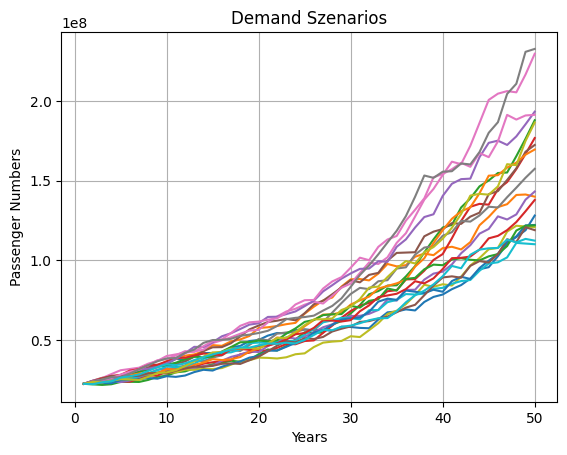

<Figure size 640x480 with 0 Axes>

In [59]:
# Required Parameters
# mu = 0.042754330256447565
# sigma = 0.05891802084811409
Dt0 = 22561132
dt = 1
# Time Horizon of Forecasts
Fth = 50
# Number of Forecasts
Forecasts = 20

# Importing the Functions File
import Functions as fn

# Callint the Scenario Creation Function
Scenario = fn.Scenario_creation(mu, sigma, Dt0, dt, Fth, Forecasts)

# Calling the Scenario Plotting Function
fn.Scenario_plot(Scenario, Fth)

## Calculation of the Traditional NPV


Inputs for NPV Calculation

In [60]:
r_D = 0.03  # Revenues per Unit of Demand per Period
r_K = 0.03  # Revenues per Unit of Capacity per Period
co_K = 0.01  # Operational costs per unit of capacity per period
co_D = 0.004  # Operational cost per unit of demand per period
ci_K = 10  # Installation cost per unit of capacity
discount = 0.05  # Discount factor
EoS = 0.85  # EoS factor

D = Scenario  # Assinging the Scenarios as Demand

Creation of a Capacity Estimation

In [61]:
# Calculate a Mean Scenario as Estimation Vector
meansvalues = np.mean(Scenario, axis=0)

# Creation of a time vector
t = np.arange(0, Fth, dt)

# Assinging the Mean Sceanrio as Capacity Vector
capacity_vector = meansvalues
# fn.Scenario_plot(capacity_vector, 50)

Creation of a Staircase Vector based on the Capacity Estimation

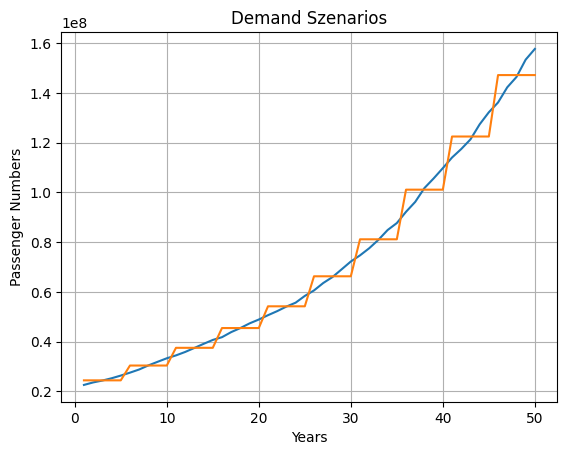

<Figure size 640x480 with 0 Axes>

In [62]:
# Number of Capacity Changes
num_steps = 10
# Qunatify the nonlinear Capacity Vector into a Step Vector
bin_size = len(capacity_vector) // num_steps
staircase_vector = np.zeros(len(capacity_vector))
for i in range(num_steps):
    start_idx = i * bin_size
    end_idx = (i + 1) * bin_size
    if i == num_steps - 1:
        end_idx = len(capacity_vector)
    avg_value = np.mean(capacity_vector[start_idx:end_idx])
    staircase_vector[start_idx:end_idx] = avg_value

K = staircase_vector
Capacity_plot = np.array([capacity_vector, staircase_vector])
fn.Scenario_plot(Capacity_plot, Fth)

Calling the NPV Calculation Function

In [63]:
NPVs = fn.NPV_Calculation(D, K, t, r_D, r_K, co_K, co_D, ci_K, discount, EoS)
print("NPVs = ", NPVs)

NPVs =  [12043856.84317265 15506994.29346574 12539994.00204226 12453874.04706685
 11716810.91295471 16551314.24562484 19614131.72794377 13889962.97598378
  9782684.33522058 11523085.65894766 10165046.42047762 13817509.53725022
 13289113.87019005 13194064.5155107  18574393.13395707 10559249.21458418
 19648124.42444875 18979918.92320056 14098186.91923169 11641847.6005744 ]


Calculating the ENPV

In [64]:
ENPV = np.mean(NPVs)
print("ENPV = ", ENPV)

ENPV =  13979508.180092404


## Creating a Flexible Capacity Vector

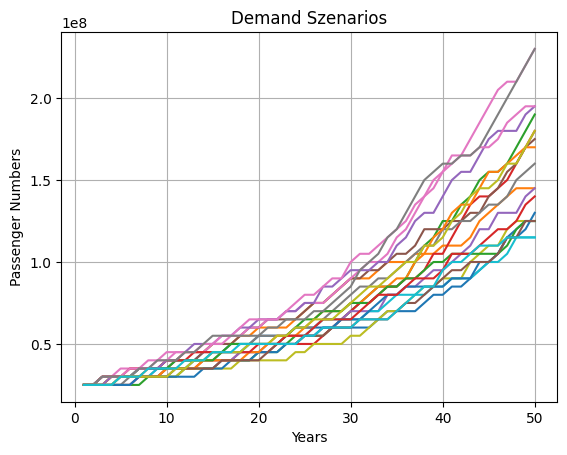

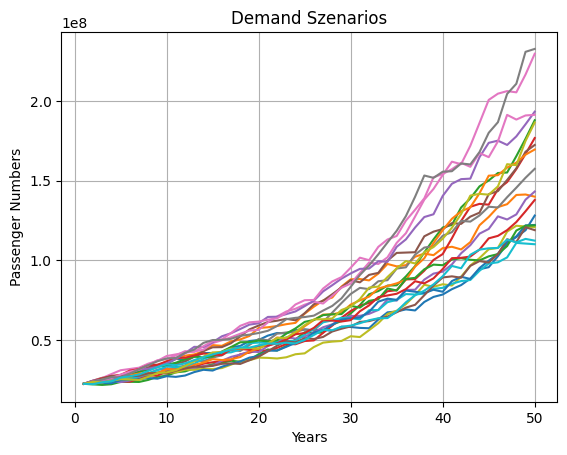

<Figure size 640x480 with 0 Axes>

In [68]:
# Initial Capacity
K0 = 25000000
# Capacity Increase Vector
deltaK_Flex = [5000000, 10000000, 20000000]

Flexible_Capacity = fn.Decision_Rule(D, K0, deltaK_Flex)

fn.Scenario_plot(Flexible_Capacity)
fn.Scenario_plot(D)

## Plotting Historic Data (For Reference Only)
Plotting Excel Data (Specific to Sample Excel, all other Inputs need to be adjusted to it)

In [66]:
# # Plotting Excel Data (only specific to Test Excel, keys needs to be changed for other
# # data)

# plt.plot(
#     Year,
#     Historic_Demand,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Demand for Zurich Airport")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Annual_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Change of Passenger Demand")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Percentage_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Percentage Change of Passenger Demand")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Percentage_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Change of Passenger Demand Excluding Outlayers")
# plt.legend()  # Display legend
# plt.figure()